In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic Regression

Logistic Regression (aka log-linear classifier) is a linear model for binary (i.e., two-classes) classification.
The decision boundary for a logistic classifier is linear, i.e., the classifier needs the classes to be linearly separable.

In logistic regression, one class is repressented by the value $y=0$, and the other class is repressented by the value $y=1$.

**1-dimensional dataset example**

![log-ex1](log-ex1.png)

**2-dimensional dataset example**

![log-ex2](log-ex2.png)

Logistic regression is used to model the probability of the 2 classes via the **sigmoid function**

$$
\sigma(t) = \frac{1}{1+e^{-t}}
$$

![logistic funcion](logistic.png)

Logistic regression makes predictions using the formula:

$$
\mbox{prediction} \quad p = \sigma(\theta_0 + x_1\theta_1+\cdots+x_n\theta_n) \quad \quad \mbox{where} \quad \quad 
\sigma(t) = \frac{1}{1+e^{-t}}
$$

We can transform the prediction $p$ to binary outcome using the rule

$$
y = \left\{\begin{array}{lr}
0 & \mbox { if }\quad p<0.5\\
1 & \mbox{ if }\quad p\geq 0.5
\end{array}\right.
$$

**1-dimensional dataset example**

![log-ex1-fitted](log-ex1-fitted.png)

**2-dimensional dataset example**

![log-ex2-fitted](log-ex2-fitted.png)

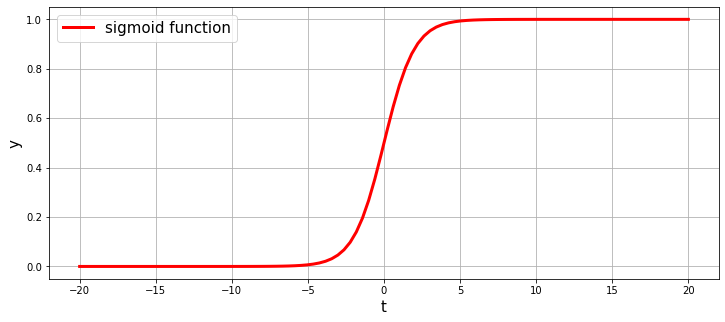

In [27]:
'sigmoid function'
def sigmoid(t):
    return 1/(1+np.exp(-t))
'plot sigmoid function'
x_sigmoid = np.linspace(-20,20,100)
y_sigmoid = sigmoid(x_sigmoid)
plt.figure(figsize=(12,5))
plt.plot(x_sigmoid,y_sigmoid,'r-', label='sigmoid function',linewidth=3)
plt.xlabel('t',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.legend(fontsize=15)
plt.grid('off')
plt.savefig('logistic.png')

In [28]:
from sklearn.linear_model import LogisticRegression

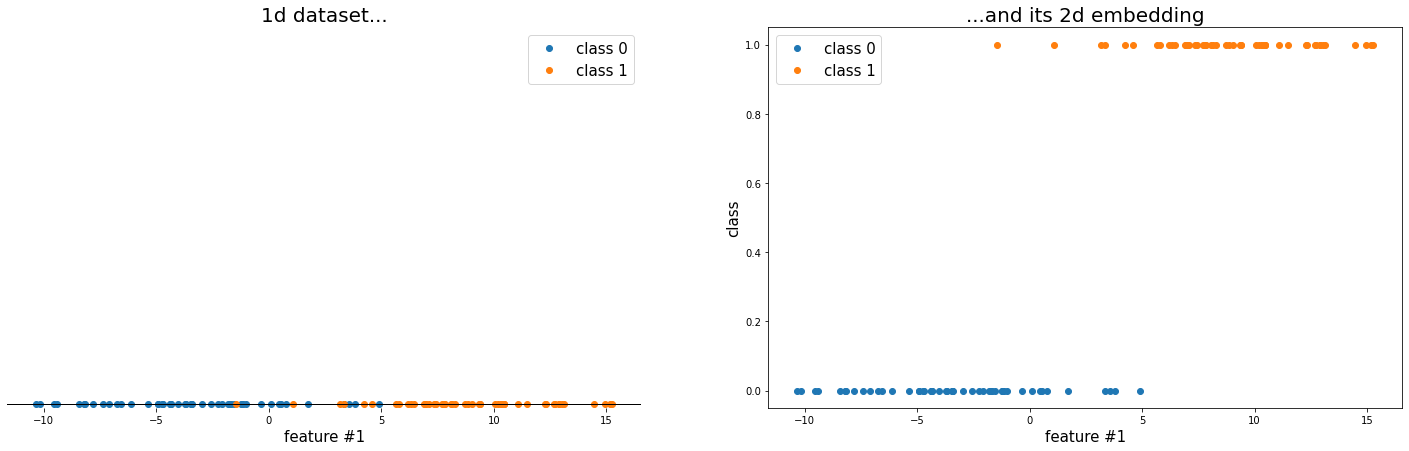

In [29]:
# generate some data
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples =100,
                 n_features = 1,
                 centers = 2,
                 cluster_std = 4.,
                 random_state=42,) 

# plot data
fig = plt.figure(figsize=(25,7))

# left-hand-side figure
ax1 = fig.add_subplot(1,2,1)

ax1.plot(X[y==0],np.zeros(len(X[y==0])),'o', label='class 0')
ax1.plot(X[y==1],np.zeros(len(X[y==1])),'o', label='class 1')

ax1.set_xlabel('feature #1',fontsize=15)
ax1.legend(fontsize=15)

ax1.axes.get_yaxis().set_visible(False)
ax1.set_frame_on(False)

xmin, xmax = ax1.get_xaxis().get_view_interval()
ymin, ymax = ax1.get_yaxis().get_view_interval()
ax1.add_artist(plt.Line2D((xmin, xmax), (0, 0), color='black', linewidth=1))
ax1.set_ylim([-0.0001,0.01])
ax1.set_title('1d dataset...',fontsize=20)

# right-hand-side figure
ax2 = fig.add_subplot(1,2,2)
ax2.plot(X[y==0],y[y==0],'o', label='class 0')
ax2.plot(X[y==1],y[y==1],'o', label='class 1')

ax2.set_xlabel('feature #1', fontsize=15)
ax2.set_ylabel('class', fontsize=15)
ax2.set_title('...and its 2d embedding',fontsize=20)
ax2.legend(fontsize=15)

plt.savefig('log-ex1.png')

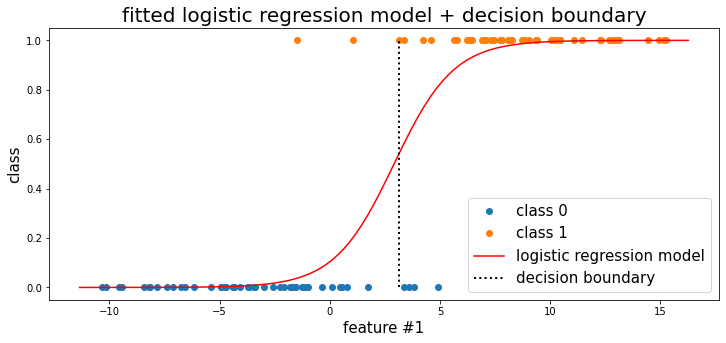

In [31]:
# plot data
plt.figure(figsize=(12,5))
plt.plot(X[y==0],y[y==0],'o', label='class 0')
plt.plot(X[y==1],y[y==1],'o', label='class 1')

# fit a logistic regression model
log_clf = LogisticRegression() 
log_clf.fit(X,y)

# plot model
x_plot = np.linspace(X.min()-1,X.max()+1,100)
y_plot = log_clf.predict_proba(x_plot[:,None])[:,1]
plt.plot(x_plot,y_plot,c='r', label='logistic regression model')

# decision boundary
decision_boundary = x_plot[y_plot >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,label='decision boundary')

plt.xlabel('feature #1', fontsize=15)
plt.ylabel('class', fontsize=15)
plt.legend(fontsize=15)
plt.title('fitted logistic regression model + decision boundary', fontsize=20)
plt.savefig('log-ex1-fitted.png')

In [32]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples =300,
                 n_features = 2,
                 centers = 2,
                 cluster_std = 2.,
                 random_state=47,) 

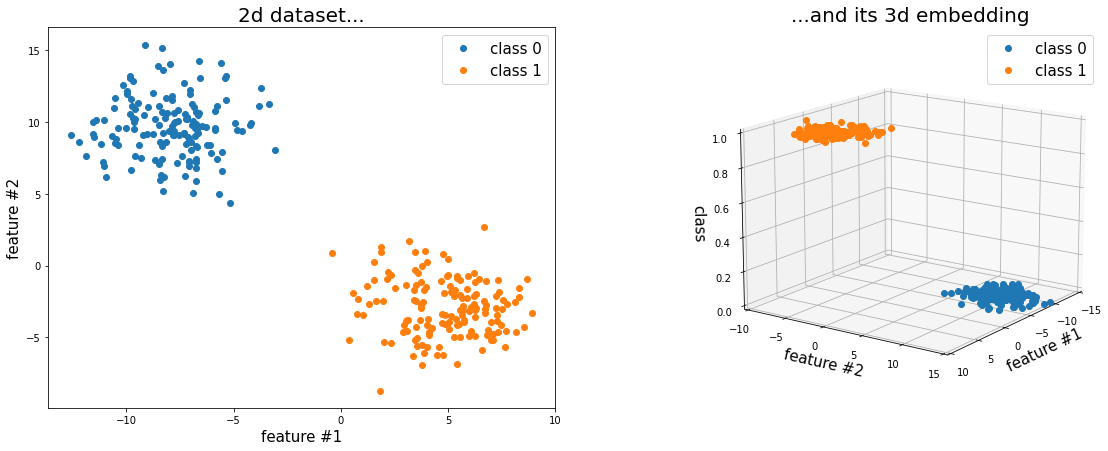

In [23]:
# fig 1
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[y==0,0],X[y==0,1],'o', label='class 0')
ax1.plot(X[y==1,0],X[y==1,1],'o', label='class 1')

ax1.set_xlabel('feature #1', fontsize=15)
ax1.set_ylabel('feature #2', fontsize=15)
ax1.legend(fontsize=15)
ax1.set_title('2d dataset...',fontsize=20)

# fig 2
ax2 = fig.add_subplot(1,2,2,projection='3d')

# plot data
ax2.plot(X[y==0,0],X[y==0,1],y[y==0],'o', label='class 0',zorder=5)
ax2.plot(X[y==1,0],X[y==1,1],y[y==1],'o', label='class 1',zorder=5)

ax2.view_init(elev=15,azim=35,)
ax2.set_xlim([-15,10])
ax2.set_ylim([-10,15])

ax2.set_xlabel('feature #1', fontsize=15)
ax2.set_ylabel('feature #2', fontsize=15)
ax2.set_zlabel('class', fontsize=15)
ax2.set_title('...and its 3d embedding',fontsize=20)
ax2.legend(fontsize=15)
plt.savefig('log-ex2.png')

In [24]:
from matplotlib.colors import ListedColormap

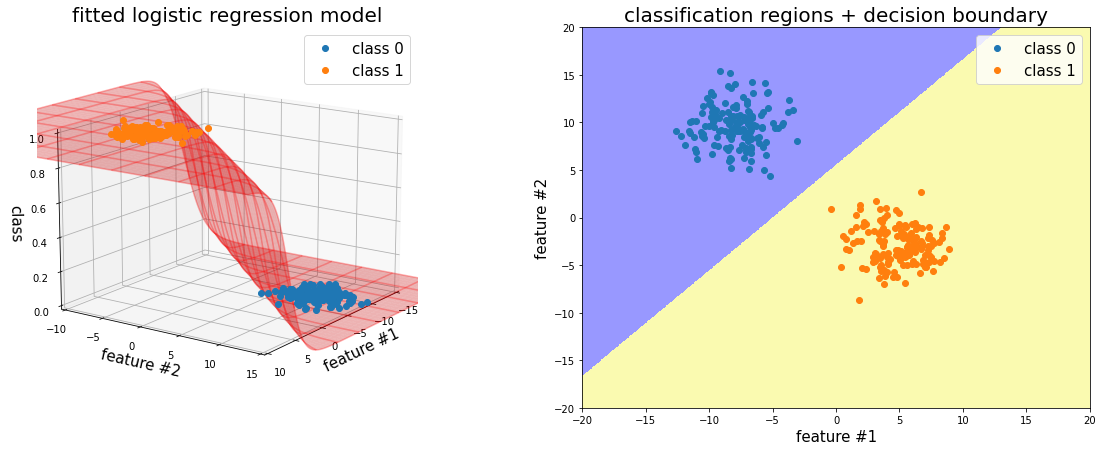

In [34]:
log_clf.fit(X,y)
xx = np.linspace(-20,20,500)
yy = np.linspace(-20,20,500)
XX,YY = np.meshgrid(xx,yy)
ZZ = log_clf.predict_proba(np.c_[(XX.ravel(), YY.ravel())])[:,1].reshape(XX.shape)

# fig 1
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(1,2,2)
ax1.plot(X[y==0,0],X[y==0,1],'o', label='class 0')
ax1.plot(X[y==1,0],X[y==1,1],'o', label='class 1')

ax1.set_xlabel('feature #1', fontsize=15)
ax1.set_ylabel('feature #2', fontsize=15)
ax1.legend(fontsize=15)
ax1.set_title('classification regions + decision boundary', fontsize=20)

ZZZ = log_clf.predict(np.c_[(XX.ravel(), YY.ravel())]).reshape(XX.shape)
custom_cmap = ListedColormap(['#9898ff','#fafab0'])
ax1.contourf(XX, YY, ZZZ, cmap=custom_cmap)

# fig 2
ax2 = fig.add_subplot(1,2,1,projection='3d')

# plot data
ax2.plot(X[y==0,0],X[y==0,1],y[y==0],'o', label='class 0',zorder=5)
ax2.plot(X[y==1,0],X[y==1,1],y[y==1],'o', label='class 1',zorder=5)

c1 = ax2.plot_surface(XX, YY, ZZ, alpha=.3,color='r')
ax2.plot_wireframe(XX, YY, ZZ, color='r',alpha=0.3, rstride=50, cstride=50)

ax2.view_init(elev=15,azim=35,)
ax2.set_xlim([-15,10])
ax2.set_ylim([-10,15])

ax2.set_xlabel('feature #1', fontsize=15)
ax2.set_ylabel('feature #2', fontsize=15)
ax2.set_zlabel('class', fontsize=15)
ax2.legend(fontsize=15)
ax2.set_title('fitted logistic regression model', fontsize=20)
plt.savefig('log-ex2-fitted.png')

In [ ]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(XX, YY, ZZ, alpha=.3,color='r')
ax.plot_wireframe(XX, YY, ZZ, color='r',alpha=0.3, rstride=50, cstride=50)

# plot data
ax.plot(X[y==0,0],X[y==0,1],y[y==0],'o', label='class 0',zorder=5)
ax.plot(X[y==1,0],X[y==1,1],y[y==1],'o', label='class 1',zorder=5)

ax.view_init(elev=15,azim=35,)

ax.set_xlim([-15,10])
ax.set_ylim([-10,15])

ax.set_xlabel('feature #1', fontsize=15)
ax.set_ylabel('feature #2', fontsize=15)
ax.set_zlabel('class', fontsize=15)
ax.legend(fontsize=15)

In [ ]:
# plot data
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(X[y==0,0],X[y==0,1],'o', label='class 0')
ax.plot(X[y==1,0],X[y==1,1],'o', label='class 1')

ax.set_xlabel('feature #1', fontsize=15)
ax.set_ylabel('feature #2', fontsize=15)
ax.legend(fontsize=15)

ZZZ = log_clf.predict(np.c_[(XX.ravel(), YY.ravel())]).reshape(XX.shape)
custom_cmap = ListedColormap(['#9898ff','#fafab0'])
ax.contourf(XX, YY, ZZZ, cmap=custom_cmap)
